In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
merged_data = pd.read_csv("merged_data.csv")

In [ ]:
# Fungsi untuk menghitung rata-rata jumlah penyewaan sepeda (cnt) pada hari kerja dan hari libur
def calculate_average_rentals(merged_data):
    avg_rentals_workingday = merged_data[merged_data['workingday'] == 1]['cnt'].mean()
    avg_rentals_holiday = merged_data[merged_data['holiday'] == 1]['cnt'].mean()
    return avg_rentals_workingday, avg_rentals_holiday

In [ ]:
# Fungsi untuk membuat plot garis tren jangka panjang
def plot_long_term_trend(merged_data):
    merged_data['dteday'] = pd.to_datetime(merged_data['dteday'])
    merged_data['days_since_start'] = (merged_data['dteday'] - merged_data['dteday'].min()).dt.days
    time_data = merged_data['days_since_start'].values.reshape(-1, 1)
    rentals_data = merged_data['cnt'].values
    model = LinearRegression()
    model.fit(time_data, rentals_data)
    predicted_rentals = model.predict(time_data)
    plt.figure(figsize=(10, 6))
    plt.fill_between(merged_data['dteday'], predicted_rentals, color='red', alpha=0.3, label='Tren Jangka Panjang')
    plt.plot(merged_data['dteday'], rentals_data, color='blue', label='Observasi', linewidth=1)
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
    plt.title('Tren Jumlah Penyewaan Sepeda dari Waktu ke Waktu (dalam Hari)')
    plt.legend()
    plt.grid(True)
    st.pyplot(plt)

2024-07-19 08:51:30.449 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


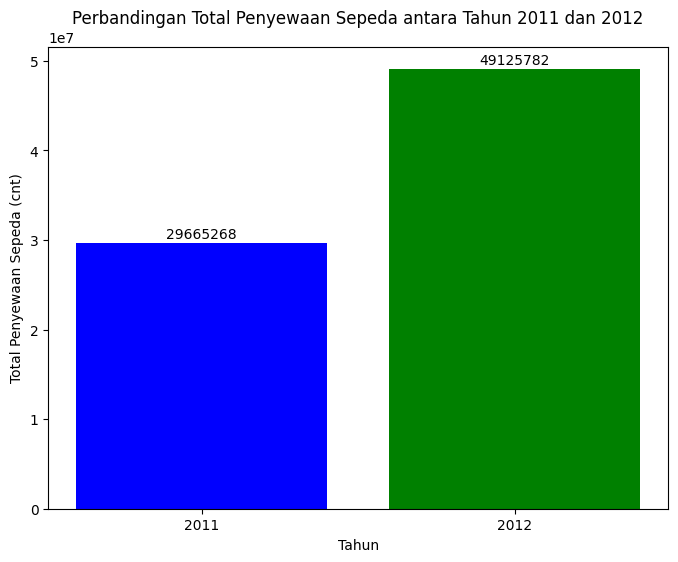

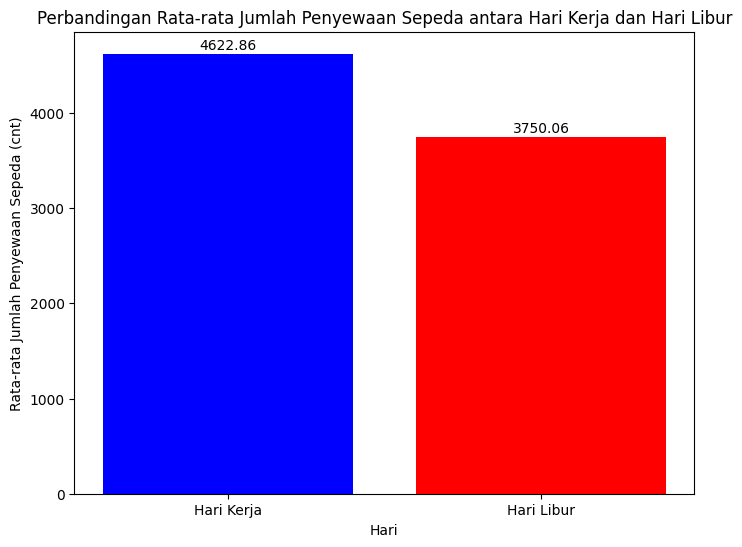

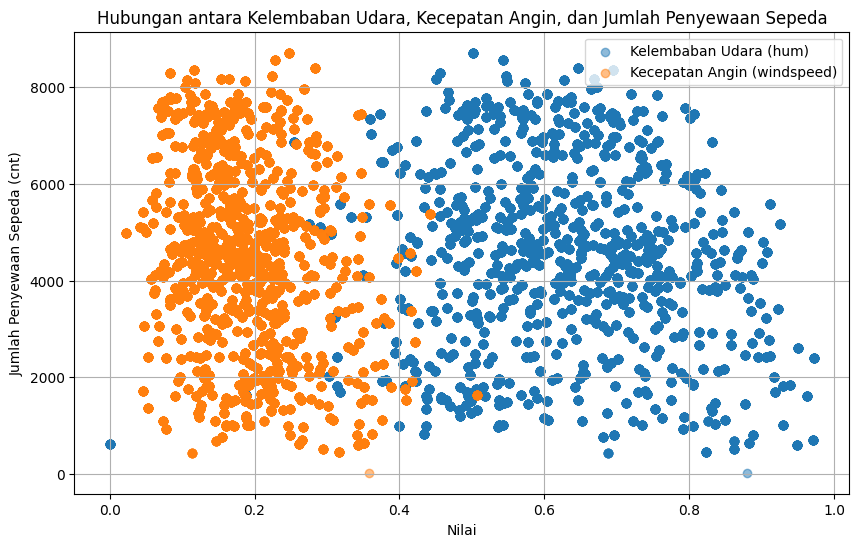

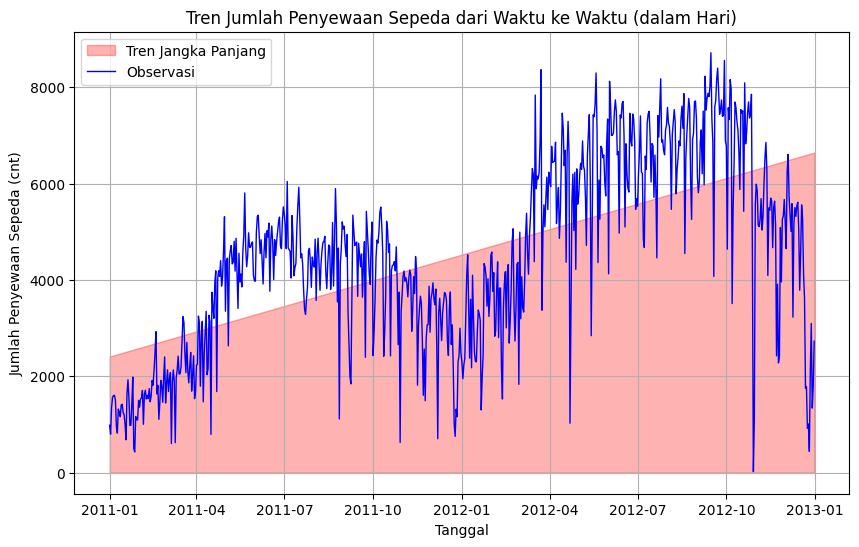

In [ ]:
# Fungsi utama untuk menjalankan dashboard
def main():
    st.title('Dashboard Penyewaan Sepeda')

    # 1. Perbandingan Total Penyewaan Sepeda antara Tahun 2011 dan 2012
    st.header('Perbandingan Total Penyewaan Sepeda antara Tahun 2011 dan 2012')
    total_rentals_2011 = merged_data[merged_data['yr'] == 0]['cnt'].sum()
    total_rentals_2012 = merged_data[merged_data['yr'] == 1]['cnt'].sum()
    years = ['2011', '2012']
    total_rentals = [total_rentals_2011, total_rentals_2012]
    plt.figure(figsize=(8, 6))
    plt.bar(years, total_rentals, color=['blue', 'green'])
    plt.xlabel('Tahun')
    plt.ylabel('Total Penyewaan Sepeda (cnt)')
    plt.title('Perbandingan Total Penyewaan Sepeda antara Tahun 2011 dan 2012')
    for i in range(len(years)):
        plt.text(i, total_rentals[i] + 500000, str(total_rentals[i]), ha='center')
    st.pyplot(plt)

    # 2. Perbandingan Rata-rata Jumlah Penyewaan Sepeda antara Hari Kerja dan Hari Libur
    st.header('Perbandingan Rata-rata Jumlah Penyewaan Sepeda antara Hari Kerja dan Hari Libur')
    avg_rentals_workingday, avg_rentals_holiday = calculate_average_rentals(merged_data)
    categories = ['Hari Kerja', 'Hari Libur']
    avg_rentals = [avg_rentals_workingday, avg_rentals_holiday]
    plt.figure(figsize=(8, 6))
    plt.bar(categories, avg_rentals, color=['blue', 'red'])
    plt.xlabel('Hari')
    plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
    plt.title('Perbandingan Rata-rata Jumlah Penyewaan Sepeda antara Hari Kerja dan Hari Libur')
    for i in range(len(categories)):
        plt.text(i, avg_rentals[i] + 50, str(round(avg_rentals[i], 2)), ha='center')
    st.pyplot(plt)

    # 3. Hubungan antara Kelembaban Udara, Kecepatan Angin, dan Jumlah Penyewaan Sepeda
    st.header('Hubungan antara Kelembaban Udara, Kecepatan Angin, dan Jumlah Penyewaan Sepeda')
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_data['hum'], merged_data['cnt'], label='Kelembaban Udara (hum)', alpha=0.5)
    plt.scatter(merged_data['windspeed'], merged_data['cnt'], label='Kecepatan Angin (windspeed)', alpha=0.5)
    plt.title('Hubungan antara Kelembaban Udara, Kecepatan Angin, dan Jumlah Penyewaan Sepeda')
    plt.xlabel('Nilai')
    plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
    plt.legend()
    plt.grid(True)
    st.pyplot(plt)

    # 4. Tren Jumlah Penyewaan Sepeda dari Waktu ke Waktu (dalam Hari)
    st.header('Tren Jumlah Penyewaan Sepeda dari Waktu ke Waktu (dalam Hari)')
    plot_long_term_trend(merged_data)

# Menjalankan aplikasi
if __name__ == '__main__':
    main()
